<a href="https://colab.research.google.com/github/alenready/ML_AI_ICT-Assignments/blob/main/ThetaFeatured_Bot_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import pandas as pd

# Read the first CSV file
df1 = pd.read_csv('/content/theta_new.csv')

# Read the second CSV file
df2 = pd.read_csv('/content/Theta_9Column.csv')



print("First CSV file:")
print(df1.head())
print("\nSecond CSV file:")
print(df2.head())


First CSV file:
   Unnamed: 0  restaurant_id           category  \
0           0              1  Extra Large Pizza   
1           1              1  Extra Large Pizza   
2           2              1  Extra Large Pizza   
3           3              1  Extra Large Pizza   
4           4              1  Extra Large Pizza   

                                  name description      price  \
0              Extra Large Meat Lovers  Whole pie.  15.99 USD   
1                  Extra Large Supreme  Whole pie.  15.99 USD   
2                Extra Large Pepperoni  Whole pie.  14.99 USD   
3  Extra Large BBQ Chicken &amp; Bacon   Whole Pie  15.99 USD   
4                 Extra Large 5 Cheese  Whole pie.  14.99 USD   

                                              Review  Rating            city  \
0  nice hotel expensive parking got good deal sta...       4  Alexander City   
1  ok nothing special charge diamond member hilto...       2     Albertville   
2  nice rooms not 4* experience hotel monaco s

In [ ]:
print(df2['SentimentScores_Featured'])

0      0.208744
1      0.235193
2      0.294420
3      0.504825
4      0.469643
         ...   
995    0.200000
996    0.307851
997    0.144709
998    0.287179
999    0.178922
Name: SentimentScores_Featured, Length: 1000, dtype: float64


In [ ]:
# unique sentimentScore_featured values for category and resturant_id


unique_sentiment_scores = df2.groupby(['category', 'restaurant_id'])['SentimentScores_Featured'].unique()
print(unique_sentiment_scores)


category                 restaurant_id
Add-Ons                  9                [0.1706349206349206, 0.2036111111111111, 0.199...
Appetizers               9                [0.3716666666666667, 0.4186666666666666, 0.216...
Appetizers               15                 [0.18, 0.1258928571428571, -0.1285714285714286]
Appetizers &amp; Salads  6                [0.2403571428571428, -0.0508823529411764, 0.32...
Bakery                   14               [0.4833333333333334, 0.1416666666666667, 0.475...
                                                                ...                        
Value Duets              14               [0.0021825396825396, 0.263939393939394, 0.3229...
Vegetarian Entrees       15               [0.36, 0.3111717449217449, 0.5441287878787879,...
Water                    1                [0.2590909090909091, 0.7666666666666666, 0.152...
Whole Fish               6                         [0.2163888888888889, 0.3218750000000001]
You Pick Two             14              

In [ ]:
# rank to category based on sentiment scores

import pandas as pd


category_ranks = df2.groupby('category')['SentimentScores_Featured'].mean().sort_values(ascending=False)
# Assuming 'restaurant_id' is the correct column name
restaurant_id_ranks = df2.groupby('restaurant_id')['SentimentScores_Featured'].mean().sort_values(ascending=False)

# Assign ranks based on mean sentiment scores
category_ranks = category_ranks.rank(ascending=False, method='dense').astype(int)

print(category_ranks)

restaurant_id_ranks = restaurant_id_ranks.rank(ascending=False, method='dense').astype(int)
print('\n\n\n\n')
print(restaurant_id_ranks) # Changed from restaurant_ranks to restaurant_id_ranks

category
Espresso Shots           1
Magnum                   2
Tuna Sandwiches          3
Sides &amp; Spreads      4
Tortas                   5
                      ... 
Appetizers             103
Kids Menu              104
Greens                 105
Pancakes               106
Kid's Meal             107
Name: SentimentScores_Featured, Length: 107, dtype: int64





restaurant_id
20     1
8      2
5      3
12     4
16     5
1      6
14     7
15     8
2      9
10    10
21    11
18    12
19    13
9     14
17    15
6     16
11    17
4     18
3     19
7     20
13    21
Name: SentimentScores_Featured, dtype: int64


In [ ]:

# Merge category ranks into df2
df2 = df2.merge(category_ranks.rename('category_ranks'), left_on='category', right_index=True, how='left')

# Merge restaurant_id ranks into df2
df2 = df2.merge(restaurant_id_ranks.rename('restaurant_id_ranks'), left_on='restaurant_id', right_index=True, how='left')

print(df2.head())


   restaurant_id           category                                 name  \
0              1  Extra Large Pizza              Extra Large Meat Lovers   
1              1  Extra Large Pizza                  Extra Large Supreme   
2              1  Extra Large Pizza                Extra Large Pepperoni   
3              1  Extra Large Pizza  Extra Large BBQ Chicken &amp; Bacon   
4              1  Extra Large Pizza                 Extra Large 5 Cheese   

  description      price                                             Review  \
0  Whole pie.  15.99 USD  nice hotel expensive parking got good deal sta...   
1  Whole pie.  15.99 USD  ok nothing special charge diamond member hilto...   
2  Whole pie.  14.99 USD  nice rooms not 4* experience hotel monaco seat...   
3   Whole Pie  15.99 USD  unique, great stay, wonderful time hotel monac...   
4  Whole pie.  14.99 USD  great stay great stay, went seahawk game aweso...   

                                     cleaned_reviews    sentiment  \

In [ ]:
df2.columns

Index(['restaurant_id', 'category', 'name', 'description', 'price', 'Review',
       'cleaned_reviews', 'sentiment', 'SentimentScores_Featured',
       'category_ranks', 'restaurant_id_ranks'],
      dtype='object')

In [ ]:
df1.columns

Index(['Unnamed: 0', 'restaurant_id', 'category', 'name', 'description',
       'price', 'Review', 'Rating', 'city', 'state', 'zipcode', 'address',
       'loc_name', 'loc_number', 'latitude', 'longitude', 'is_open',
       'closed_message', 'scan_date', 'TID'],
      dtype='object')

In [ ]:


import pandas as pd
# Find common columns
common_cols = list(set(df1.columns) & set(df2.columns))

# Remove common columns from df1
df1 = df1.drop(columns=common_cols)

# Concatenate dataframes, starting with df2
merged_df = pd.concat([df2, df1], axis=1)

# Download the merged CSV file
from google.colab import files
merged_df.to_csv('merged_data.csv', index=False)
files.download('merged_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df3=pd.read_csv('/content/merged_data.csv')
df3

,restaurant_id,category,name,description,price,Review,cleaned_reviews,sentiment,SentimentScores_Featured,category_ranks,...,zipcode,address,loc_name,loc_number,latitude,longitude,is_open,closed_message,scan_date,TID
0,1,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,Good 🙂,0.208744,18,...,35010,"4097 U S Highway 280, Alexander City, AL 35010",The Saucy Hen (4097 U. S. HIGHWAY 280),0623b7ac-598d-5016-bdd2-febb44d79b12,32.923880,-85.959650,False,Opens at 11:00 AM,2022-11-09 18:03:43,1
1,1,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,Good 🙂,0.235193,18,...,35951,"7300 Hwy 431 North, Albertville, AL 35951",Burger King (7300 Hwy 431 North),62a60773-5644-4d73-b969-a4922ce70fa6,34.277260,-86.206110,True,No message available,2022-11-09 18:03:43,2
2,1,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD,nice rooms not 4* experience hotel monaco seat...,nice room 4 experience hotel monaco seattle go...,Good 🙂,0.294420,18,...,35010,"4097 Us Highway 280, Alexander City, AL 35010",MrBeast Burger (4097 US Highway 280),308b1654-60f1-51d4-bfe2-ed7c849442ac,32.923880,-85.959650,False,Opens at 11:00 AM,2022-11-09 18:03:43,3
3,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD,"unique, great stay, wonderful time hotel monac...",unique great stay wonderful time hotel monaco ...,Excellent 😊,0.504825,18,...,35950,"7959 Us Hwy 431, Albertville, AL 35950",Taco Bell (7959 Us Highway 431),ef86513f-3973-4315-b938-bb6f230c5c58,34.280000,-86.217030,True,No message available,2022-11-09 18:03:43,4
4,1,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD,"great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...,Good 🙂,0.469643,18,...,35010,"977 Jefferson St, Alexander City, AL 35010",The Station,9507eb1b-5afc-4ee1-a566-526d9e2ba2d0,32.956127,-85.944330,False,Opens at 11:00 AM,2022-11-09 18:03:43,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,Shakes - Fruity,Cap'n Crunch Shake,"200 to 250 calories, 24 to 32 grams protein, 1...",8.5 USD,average price hotel good location 1.5 blocks u...,average price hotel good location block union ...,Good 🙂,0.200000,83,...,35209,"2101 Richard Arrington Jr Blvd S, Birmingham, ...",Walgreens (2101 Richard Arrington Jr Blvd S),9cbad917-b50b-48f6-9a27-8917ec4012a7,33.488530,-86.792370,False,Available at 7:00 AM,2022-11-09 18:03:43,996
996,21,Shakes - Fruity,PB Banana Shake,"200 to 250 calories, 24 to 32 grams protein, 1...",8.5 USD,good customer service recently wrote dissatisf...,good customer service recently wrote dissatisf...,Good 🙂,0.307851,83,...,Lorna,3321 Lorna Rd Birmingham AL 35216,"Veggie Mania (3321 Lorna Rd, Birmingham, AL 35...",fab0df13-6da0-5223-94d0-ed77210724ee,33.393530,-86.796730,False,Opens at 11:00 AM,2022-11-09 18:03:43,997
997,21,Shakes - Fruity,Banana Bread Shake,"200 to 250 calories, 24 to 32 grams protein, 1...",8.5 USD,ignore bad press just post review reading nega...,ignore bad press post review reading negative ...,Good 🙂,0.144709,83,...,35205,"1024 20th Street South Unit 101, Birmingham, A...",Ministry Of Curry,d72b60c3-3e53-444e-87d7-957fd18d3469,33.500900,-86.796900,False,Available at 11:00 AM,2022-11-09 18:03:43,998
998,21,Shakes - Fruity,Strawberry Banana Shake,"200 to 250 calories, 24 to 32 grams protein, 1...",8.5 USD,"business trip ok hotel fine evening business, ...",business trip ok hotel fine evening business m...,Good 🙂,0.287179,83,...,35244,"3020 John Hawkins Pkwy, Hoover, AL 35244",Chick-fil-A (3020 John Hawkins Pkwy),22f33091-d538-46ce-af4b-2b5ed753d1fd,33.371720,-86.812815,False,Available at 6:00 AM,2022-11-09 18:03:43,999


In [ ]:
df3.columns

Index(['restaurant_id', 'category', 'name', 'description', 'price', 'Review',
       'cleaned_reviews', 'sentiment', 'SentimentScores_Featured',
       'category_ranks', 'restaurant_id_ranks', 'Unnamed: 0', 'Rating', 'city',
       'state', 'zipcode', 'address', 'loc_name', 'loc_number', 'latitude',
       'longitude', 'is_open', 'closed_message', 'scan_date', 'TID'],
      dtype='object')

In [ ]:
print(df1['Rating'])

0      4
1      2
2      3
3      5
4      5
      ..
995    3
996    4
997    4
998    3
999    3
Name: Rating, Length: 1000, dtype: int64


In [ ]:
print(df2['sentiment'])

0           Good 🙂
1           Good 🙂
2           Good 🙂
3      Excellent 😊
4           Good 🙂
          ...     
995         Good 🙂
996         Good 🙂
997         Good 🙂
998         Good 🙂
999         Good 🙂
Name: sentiment, Length: 1000, dtype: object


In [ ]:
# the Rating 1 in df1

print(df1[df1['Rating'] == 1])


     Unnamed: 0  restaurant_id           category  \
15           15              1  Spicy Jumbo Wings   
32           32              1             Snacks   
40           40              1              Candy   
65           65              1             Energy   
69           69              1              Juice   
..          ...            ...                ...   
983         983             21   Shakes - Vanilla   
984         984             21   Shakes - Vanilla   
985         985             21   Shakes - Vanilla   
988         988             21    Shakes - Fruity   
991         991             21    Shakes - Fruity   

                                        name  \
15    Jumbo Spicy Chicken Wings Seven Pieces   
32   Wonderful Roasted and Salted Pistachios   
40                         Haribo Gold Bears   
65                                  Red Bull   
69                  Tropicana Orange No Pulp   
..                                       ...   
983           White Chocola

In [ ]:
# the terrible sentiment rows in df2
terrible_sentiment_threshold = -.5 # Example: Sentiment scores below 1 are considered terrible

# Filter rows where 'SentimentScores_Featured' is below the threshold
terrible_sentiment_rows = df2[df2['SentimentScores_Featured'] < terrible_sentiment_threshold]

print(terrible_sentiment_rows)


     restaurant_id        category                       name  \
65               1          Energy                   Red Bull   
534             13  The Bun Of Day  Break Of Day Bacon Burger   

                                           description     price  \
65                                           12oz can.  3.79 USD   
534  American beef patty topped with melted cheese,...  9.39 USD   

                                                Review  \
65   hated inn terrible, room-service horrible staf...   
534  not understanding booked hotel inlaws weekend ...   

                                       cleaned_reviews   sentiment  \
65   hated inn terrible horrible staff decor recent...  Terrible 😡   
534  understanding booked hotel inlaws weekend away...  Terrible 😡   

     SentimentScores_Featured  category_ranks  restaurant_id_ranks  
65                  -0.633333              42                    6  
534                 -0.550000              92                   21  


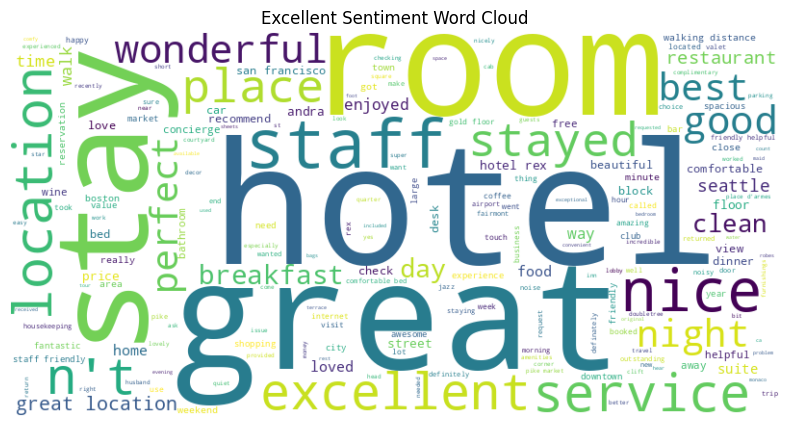

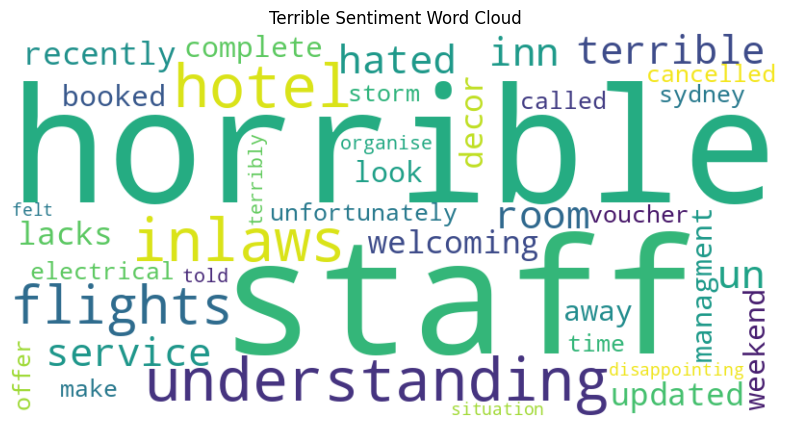

In [ ]:
# word cloud for sentiment Excellant and terrible from merged_data

!pip install wordcloud

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the merged data
merged_data = pd.read_csv('/content/merged_data.csv')

# Filter for excellent and terrible sentiments
excellent_threshold = 0.5  # Example threshold
terrible_threshold = -0.5   # Example threshold

excellent_reviews = merged_data[merged_data['SentimentScores_Featured'] > excellent_threshold]['Review']
terrible_reviews = merged_data[merged_data['SentimentScores_Featured'] < terrible_threshold]['Review']

# Combine reviews into single strings
excellent_text = ' '.join(review for review in excellent_reviews if isinstance(review, str))
terrible_text = ' '.join(review for review in terrible_reviews if isinstance(review, str))


# Generate word clouds
wordcloud_excellent = WordCloud(width=800, height=400, background_color='white').generate(excellent_text)
wordcloud_terrible = WordCloud(width=800, height=400, background_color='white').generate(terrible_text)


# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_excellent, interpolation='bilinear')
plt.axis("off")
plt.title("Excellent Sentiment Word Cloud")
plt.show()


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_terrible, interpolation='bilinear')
plt.axis("off")
plt.title("Terrible Sentiment Word Cloud")
plt.show()


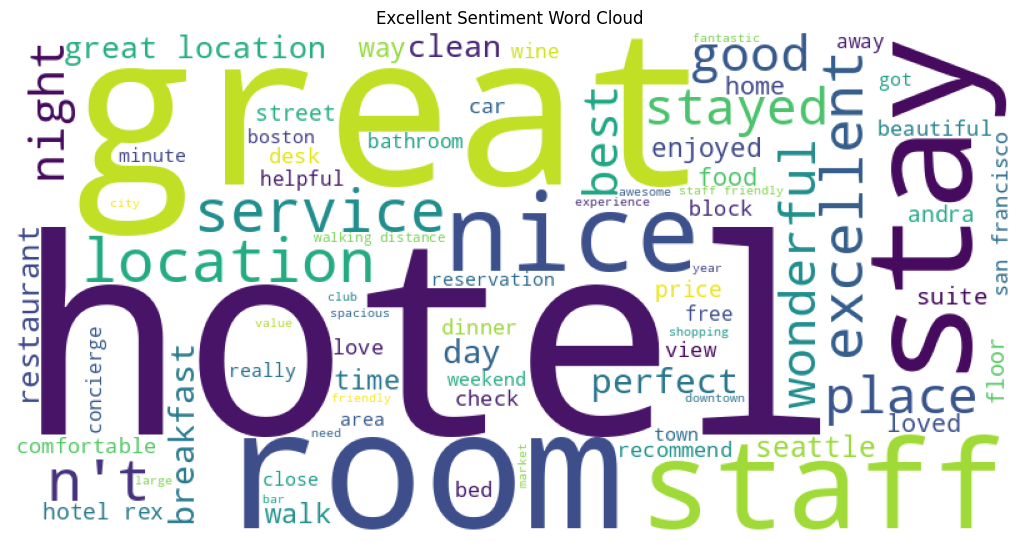

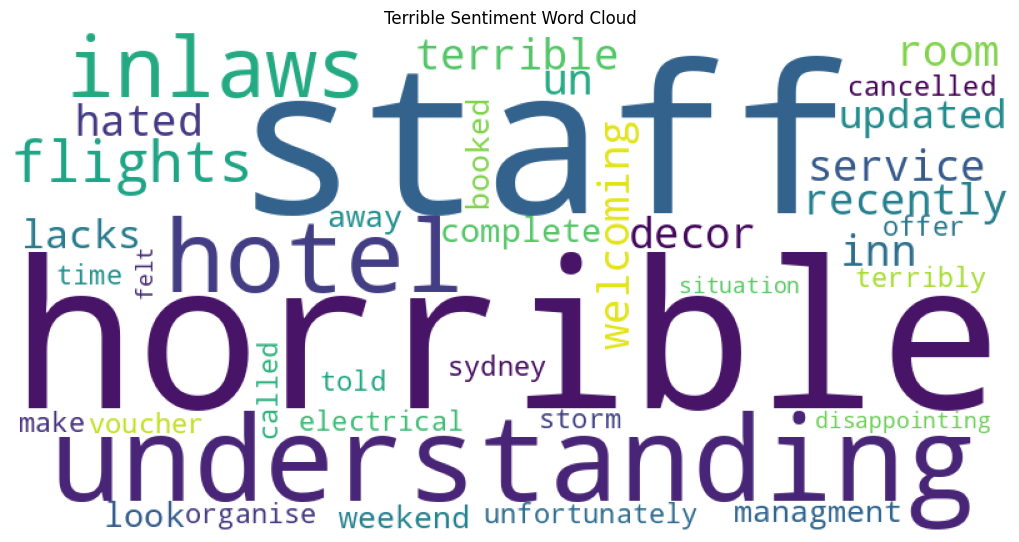

In [ ]:
from wordcloud import WordCloud, STOPWORDS



# Function to generate and display word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          stopwords=STOPWORDS,  # Add common words to stopwords
                          min_font_size=10).generate(text)

    plt.figure(figsize=(10, 5), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(title)
    plt.show()

# Filter for excellent and terrible sentiments (adjust thresholds as needed)
excellent_threshold = 0.5
terrible_threshold = -0.5

# Handle potential missing 'Review' column or non-string values
excellent_reviews = merged_data[merged_data['SentimentScores_Featured'] > excellent_threshold]['Review']
terrible_reviews = merged_data[merged_data['SentimentScores_Featured'] < terrible_threshold]['Review']

excellent_text = ' '.join([str(review) for review in excellent_reviews if isinstance(review, str)])
terrible_text = ' '.join([str(review) for review in terrible_reviews if isinstance(review, str)])

# Generate and display word clouds
generate_wordcloud(excellent_text, "Excellent Sentiment Word Cloud")
generate_wordcloud(terrible_text, "Terrible Sentiment Word Cloud")


In [ ]:
!pip install gradio
!pip install openai
!pip install --upgrade --no-cache-dir git+https://github.com/openai/whisper.git
!pip install whisper
import gradio as gr
import random

# List of food-related proverbs
food_proverbs = [
    "A hungry belly has no ears.",
    "The proof of the pudding is in the eating.",
    "An apple a day keeps the doctor away.",
    "You can't make an omelet without breaking eggs.",
    "Half a loaf is better than none."
]

# Function to process audio input
def food_chatbot(audio_file):
    if audio_file:
        message = "I received your voice input."
    else:
        message = "Please provide an audio input."

    # Chatbot response
    response = f"You said something. What would you like to order?"

    # Random food proverb
    proverb = random.choice(food_proverbs)

    return response, proverb

# Gradio interface
iface = gr.Interface(
    fn=food_chatbot,
    inputs=gr.Audio(type="filepath"),  # Updated to accept an audio file
    outputs=[gr.Textbox(label="Chatbot Response"), gr.Textbox(label="Food Proverb")],
    title="Food Ordering Chatbot",
    description="Speak your order, and get a random food-related proverb!",
)

iface.launch()


  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-ilnhjazw
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-ilnhjazw
  Resolved https://github.com/openai/whisper.git to commit 517a43ecd132a2089d85f4ebc044728a71d49f6e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://12eb405116f66a8674.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
